# Query #1: Show the trend of the number of men and women in the different rounds.

In [4]:
import pandas as pd
MatchAwayTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchAwayTeamInfo.csv")
MatchHomeTeamInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchHomeTeamInfo.csv")

MatchRoundInfo = pd.read_csv(r"E:\Data Analysis Course\Data analyse\tennis_data_analysis\data\raw\MatchRoundInfo.csv")
combined_home_away = pd.concat([MatchHomeTeamInfo[['player_id', 'gender', 'match_id']], 
                                MatchAwayTeamInfo[['player_id', 'gender', 'match_id']]], 
                               ignore_index=True).drop_duplicates(subset=['player_id', 'match_id'])
merged_event = pd.merge(combined_home_away,MatchRoundInfo , on='match_id')
gender_round_counts = merged_event.groupby(['name', 'gender']).size().unstack(fill_value=0)
# Rename the index and columns for better readability
gender_round_counts.index.name = 'Round'
gender_round_counts.columns = ['Female', 'Male']


# Reorder the index as desired
desired_order = ['Qualification round 1','Qualification round 2', 'Round of 128', 'Round of 64', 'Round of 32', 'Round of 16', 
                 'Quarterfinals', 'Semifinals', 'Final']
gender_counts_reordered = gender_round_counts.reindex(desired_order, fill_value=0)

print(gender_counts_reordered)

                       Female  Male
Round                              
Qualification round 1     538  1122
Qualification round 2     221   239
Round of 128              472   556
Round of 64               557   338
Round of 32              4071  4382
Round of 16              2328  2560
Quarterfinals            1174  1299
Semifinals                541   619
Final                     250   288


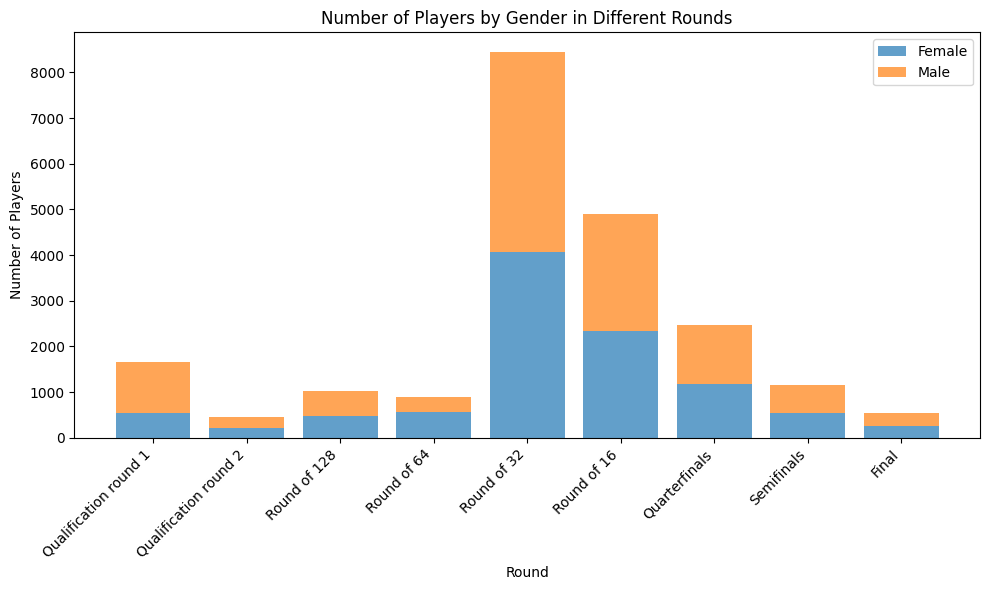

In [7]:

import matplotlib.pyplot as plt

# Assume you have gender_counts_reordered DataFrame from your previous code

# Define the desired order of rounds for plotting
desired_order = ['Qualification round 1', 'Qualification round 2', 'Round of 128', 'Round of 64',
                 'Round of 32', 'Round of 16', 'Quarterfinals', 'Semifinals', 'Final']

# Reindex the DataFrame based on the desired order
gender_counts_reordered = gender_counts_reordered.reindex(desired_order, fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot bars for Female
plt.bar(gender_counts_reordered.index, gender_counts_reordered['Female'], label='Female', alpha=0.7)

# Plot bars for Male stacked on top of Female
plt.bar(gender_counts_reordered.index, gender_counts_reordered['Male'], bottom=gender_counts_reordered['Female'], 
        label='Male', alpha=0.7)

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Number of Players')
plt.title('Number of Players by Gender in Different Rounds')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


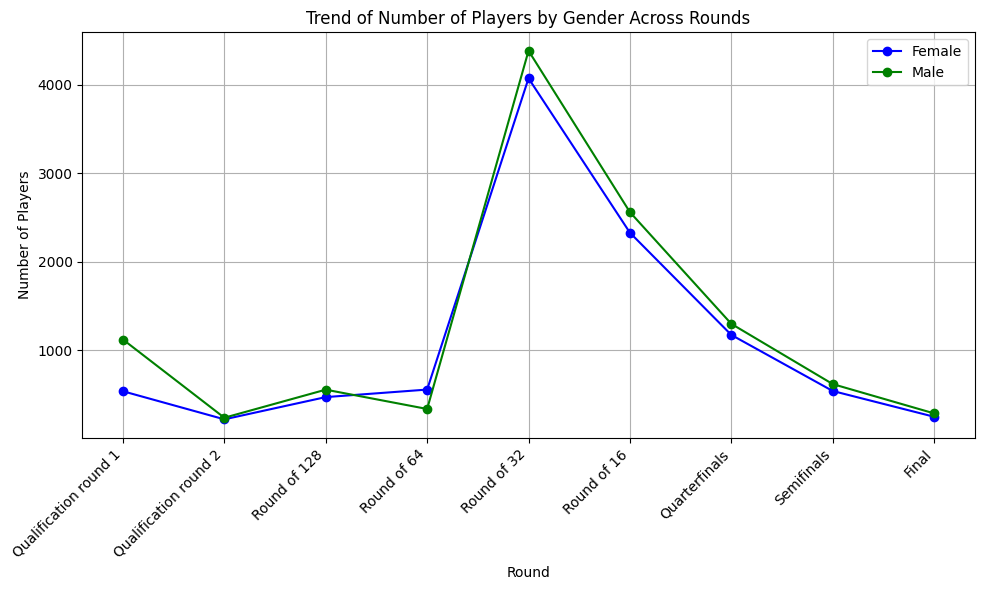

In [8]:
import matplotlib.pyplot as plt

# Assuming gender_counts_reordered DataFrame is already defined as per previous interactions

# Define the desired order of rounds for plotting
desired_order = ['Qualification round 1', 'Qualification round 2', 'Round of 128', 'Round of 64',
                 'Round of 32', 'Round of 16', 'Quarterfinals', 'Semifinals', 'Final']

# Reindex the DataFrame based on the desired order
gender_counts_reordered = gender_counts_reordered.reindex(desired_order, fill_value=0)

# Extract the round names and the counts for each gender
rounds = gender_counts_reordered.index
female_counts = gender_counts_reordered['Female']
male_counts = gender_counts_reordered['Male']

# Plotting
plt.figure(figsize=(10, 6))

# Plot the trend for Female
plt.plot(rounds, female_counts, marker='o', linestyle='-', color='b', label='Female')

# Plot the trend for Male
plt.plot(rounds, male_counts, marker='o', linestyle='-', color='g', label='Male')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Number of Players')
plt.title('Trend of Number of Players by Gender Across Rounds')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
